In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv("input/data-salary.txt")
print(df.head(1))
print(df.shape)
X = df.X.values
y = df.Y.values
N = df.shape[0]

    X    Y
0  24  472
(20, 2)


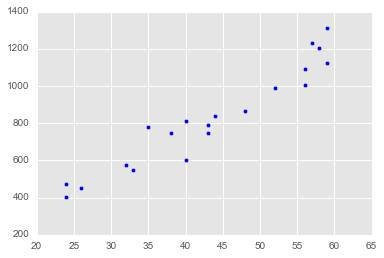

In [3]:
plt.scatter(X, y)

In [4]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
res_lm = smf.ols('Y ~ X', data=df).fit()
res_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     208.2
Date:                Fri, 04 Nov 2016   Prob (F-statistic):           2.47e-11
Time:                        00:26:12   Log-Likelihood:                -114.74
No. Observations:                  20   AIC:                             233.5
Df Residuals:                      18   BIC:                             235.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   -119.6971     68.148     -1.756      0.096      -262.871    23.477
X             21.9042      1.518     14.428      0.000        18.715    25.094
==============================================================================
Omnibus:                        0.099   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.952   Jarque-Bera (JB):                0.216
Skew:                           0.140   Prob(JB):                        0.898
Kurtosis:                       2.575   Cond. No.                         173.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
from statsmodels.stats.outliers_influence import summary_table
st, data, _ = summary_table(res_lm, alpha=0.05)

In [6]:
st

Obs,Dep Var,Predicted,Std Error,Mean ci,Mean ci,Predict ci,Predict ci,Residual,Std Error,Student,Cook's
,Population,Value,Mean Predict,95% low,95% upp,95% low,95% upp,,Residual,Residual,D
1.0,472.0,406.003702271,34.2902643298,333.962530175,478.044874367,224.879500963,587.127903579,65.9962977289,71.2799011262,0.925875270394,0.0991933281345
2.0,403.0,406.003702271,34.2902643298,333.962530175,478.044874367,224.879500963,587.127903579,-3.00370227109,71.2799011262,-0.0421395403702,0.000205474097501
3.0,454.0,449.812105137,31.7276820162,383.154718703,516.469491571,270.761126395,628.863083879,4.18789486287,72.4568887425,0.0577984362225,0.000320272394109
4.0,575.0,581.237313735,24.6931088237,529.359017166,633.115610305,407.147097246,755.327530225,-6.23731373524,75.1458376026,-0.0830027841093,0.00037196065654
5.0,546.0,603.141515168,23.6587034885,553.436423566,652.846606771,429.686500961,776.596529375,-57.1415151683,75.4778926681,-0.75706293788,0.0281563481188
6.0,781.0,646.949918034,21.7608051505,601.23216288,692.667673188,474.595170613,819.304665456,134.050081966,76.0467875165,1.76273168589,0.127212738556
7.0,750.0,712.662522333,19.4628637173,671.772562983,753.552481683,541.525049529,883.799995138,37.3374776666,76.6670950819,0.487007856849,0.00764253447968
8.0,601.0,756.470925199,18.4037651513,717.80604937,795.135801029,585.851411528,927.09043887,-155.470925199,76.928200035,-2.02098742891,0.116879797885
9.0,814.0,756.470925199,18.4037651513,717.80604937,795.135801029,585.851411528,927.09043887,57.5290748006,76.928200035,0.747828166712,0.0160035328303


In [7]:
predicted_value = data[:,2].T
mean_ci_low, mean_ci_upp = data[:,4:6].T
predict_ci_low, predict_ci_upp = data[:,6:8].T

#### confidence interval

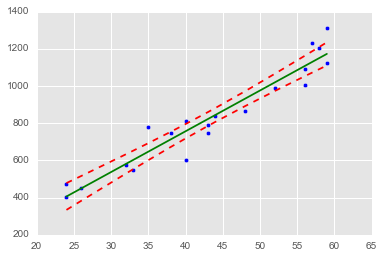

In [8]:
plt.scatter(X, y)
plt.plot(X, predicted_value, '-', color='g')
plt.plot(X, mean_ci_low, '--', color='r')
plt.plot(X, mean_ci_upp, '--', color='r')

#### prediction interval

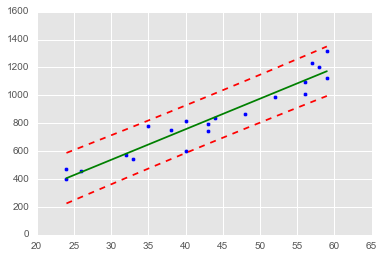

In [9]:
plt.scatter(X, y)
plt.plot(X, predicted_value, '-', color='g')
plt.plot(X, predict_ci_low, '--', color='r')
plt.plot(X, predict_ci_upp, '--', color='r')

### 4.4.5 stanで実装

In [10]:
import pystan
stan_data = {'N':N, 'X':X, 'Y': y}
fit = pystan.stan(file='input/model4-5.stan', data=stan_data, seed=1234)

In [11]:
fit

Inference for Stan model: anon_model_b434bb1e5d9d51500bfdc976c8c173bc.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
a     -123.4    3.24  73.86 -264.7 -172.1 -123.6 -76.07  25.18    520    1.0
b      21.98    0.07   1.64  18.73  20.94  21.99  23.07   25.1    517    1.0
sigma  84.96     0.6  15.58  61.47  73.85  82.75  93.29 121.64    677    1.0
lp__  -93.64    0.06   1.34 -97.23  -94.2 -93.29 -92.67 -92.14    539    1.0

Samples were drawn using NUTS(diag_e) at Fri Nov  4 00:26:56 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

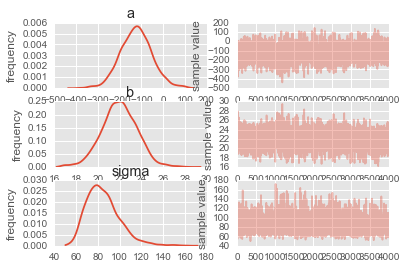

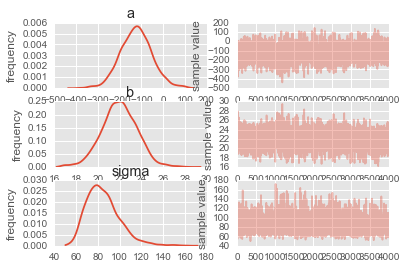

In [12]:
fit.plot()

### 4.4.9 MCMCの設定変更

In [13]:
stanmodel = pystan.StanModel(file='input/model4-5.stan')

In [14]:
fit_modified = stanmodel.sampling(data=stan_data, pars=["b", "sigma"], 
                                   init=lambda: {"a":np.random.uniform(-10,10, 1)[0],"b":np.random.uniform(-10,10,1)[0], "sigma":10},seed=123, chains=3, iter=1000,warmup=200, thin=2)

In [15]:
fit_modified

Inference for Stan model: anon_model_b434bb1e5d9d51500bfdc976c8c173bc.
3 chains, each with iter=1000; warmup=200; thin=2; 
post-warmup draws per chain=400, total post-warmup draws=1200.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
b      21.94     0.1   1.74  18.69  20.74  21.92  23.07  25.63    293    1.0
sigma  86.31    0.92  16.37  61.64  74.73  84.28  93.81 127.42    317    1.0
lp__  -93.79    0.08   1.37 -97.28 -94.43 -93.42 -92.78 -92.16    271    1.0

Samples were drawn using NUTS(diag_e) at Fri Nov  4 00:27:36 2016.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

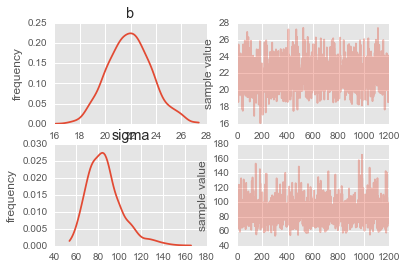

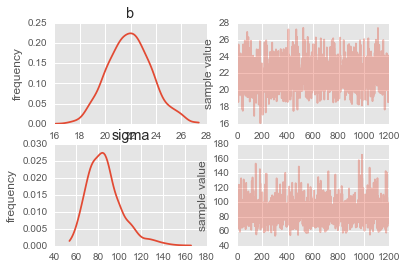

In [16]:
fit_modified.plot()

In [17]:
# コンパイルを省くためにモデル保存
import pickle
with open("tmp/4-4-9stanmodel.model", "wb") as f:
    pickle.dump(stanmodel, f)